In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# Baca data transaksi penjualan
data_transaksi_penjualan = pd.read_csv('/content/Data_TPT_Forecasting_Terbaru.csv')
data_transaksi_penjualan = data_transaksi_penjualan[["week_id","total_transactions"]]
data_transaksi_penjualan

,week_id,total_transactions
0,1,89
1,2,65
2,3,78
3,4,65
4,5,83
...,...,...
322,323,71
323,324,97
324,325,98
325,326,98


In [ ]:
# Mengatasi nilai NaN dengan interpolasi
data_transaksi_penjualan['week_id'] = data_transaksi_penjualan['week_id'].interpolate()

# Bagi data menjadi fitur (X) dan label (y)
X = data_transaksi_penjualan[['week_id']].values
y = data_transaksi_penjualan['total_transactions'].values

# Penskalaan fitur
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_scaled = sc_X.fit_transform(X)
# y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Inisialisasi dan pelatihan model SVR
svr_model = []

index_data = 0
for g in range(1,10,2):
  for e in range(1,10,2):
    svr_regressor = SVR(kernel="rbf", C=1000, gamma=g/10, epsilon=e/10)

    # svr_regressor = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
    svr_regressor.fit(X_train, y_train)

    svr_model.append(svr_regressor)

    print(f"Model_SVR_version_{index_data}: gamma: {g/10}, epsilon={e/10}")
    index_data+=1

Model_SVR_version_0: gamma: 0.1, epsilon=0.1
Model_SVR_version_1: gamma: 0.1, epsilon=0.3
Model_SVR_version_2: gamma: 0.1, epsilon=0.5
Model_SVR_version_3: gamma: 0.1, epsilon=0.7
Model_SVR_version_4: gamma: 0.1, epsilon=0.9
Model_SVR_version_5: gamma: 0.3, epsilon=0.1
Model_SVR_version_6: gamma: 0.3, epsilon=0.3
Model_SVR_version_7: gamma: 0.3, epsilon=0.5
Model_SVR_version_8: gamma: 0.3, epsilon=0.7
Model_SVR_version_9: gamma: 0.3, epsilon=0.9
Model_SVR_version_10: gamma: 0.5, epsilon=0.1
Model_SVR_version_11: gamma: 0.5, epsilon=0.3
Model_SVR_version_12: gamma: 0.5, epsilon=0.5
Model_SVR_version_13: gamma: 0.5, epsilon=0.7
Model_SVR_version_14: gamma: 0.5, epsilon=0.9
Model_SVR_version_15: gamma: 0.7, epsilon=0.1
Model_SVR_version_16: gamma: 0.7, epsilon=0.3
Model_SVR_version_17: gamma: 0.7, epsilon=0.5
Model_SVR_version_18: gamma: 0.7, epsilon=0.7
Model_SVR_version_19: gamma: 0.7, epsilon=0.9
Model_SVR_version_20: gamma: 0.9, epsilon=0.1
Model_SVR_version_21: gamma: 0.9, epsilon=0.

In [ ]:
data = {
    "week_id":list(X_test.flatten()),
    "actual_transaction":list(y_test),
}

evaluasi = []

for i,s_model in enumerate(svr_model):
  # Prediksi transaksi penjualan untuk tahun 2024
  y_pred = s_model.predict(X_test)
  # y_pred_scaled = y_pred_scaled.reshape(-1, 1)
  # y_pred = sc_y.inverse_transform(y_pred_scaled)
  data[f"Model_SVR_version_{i}"] = list(y_pred.flatten())

  evaluasi.append({
      "model_name"  : f"Model_SVR_version_{i}",
      "MAE"         : mean_absolute_error(list(y_test),list(y_pred.flatten())),
      "MSE"         : mean_squared_error(list(y_test),list(y_pred.flatten())),
      "RMSE"        : root_mean_squared_error(list(y_test),list(y_pred.flatten()))
  })
evaluasi = pd.DataFrame(evaluasi)

<Axes: xlabel='week_id'>

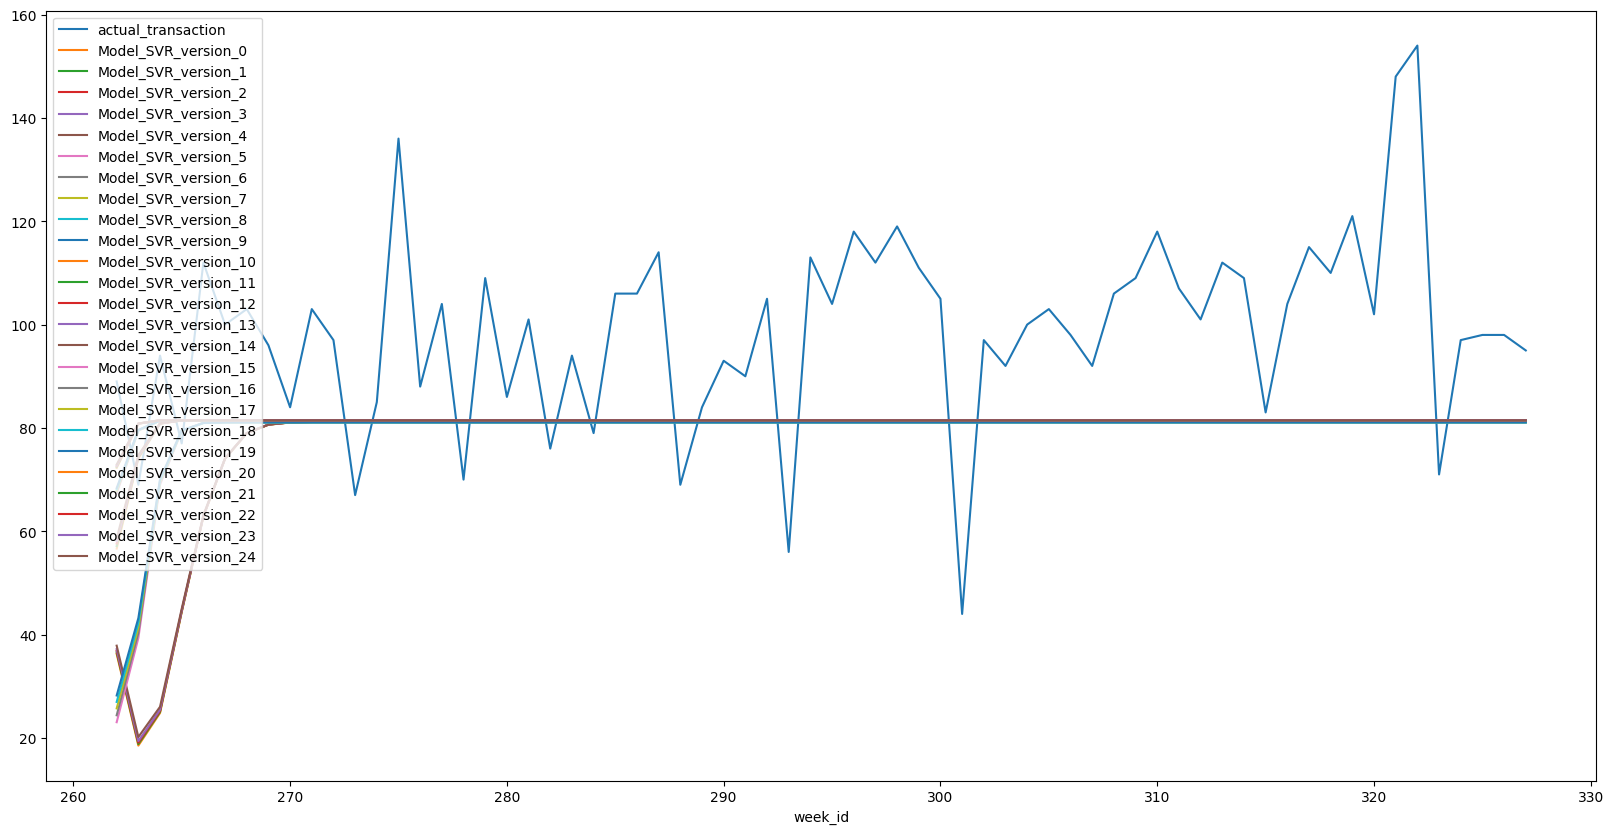

In [ ]:
df = pd.DataFrame.from_dict(data)

df.plot(x="week_id",figsize=(20, 10))

<Axes: xlabel='model_name'>

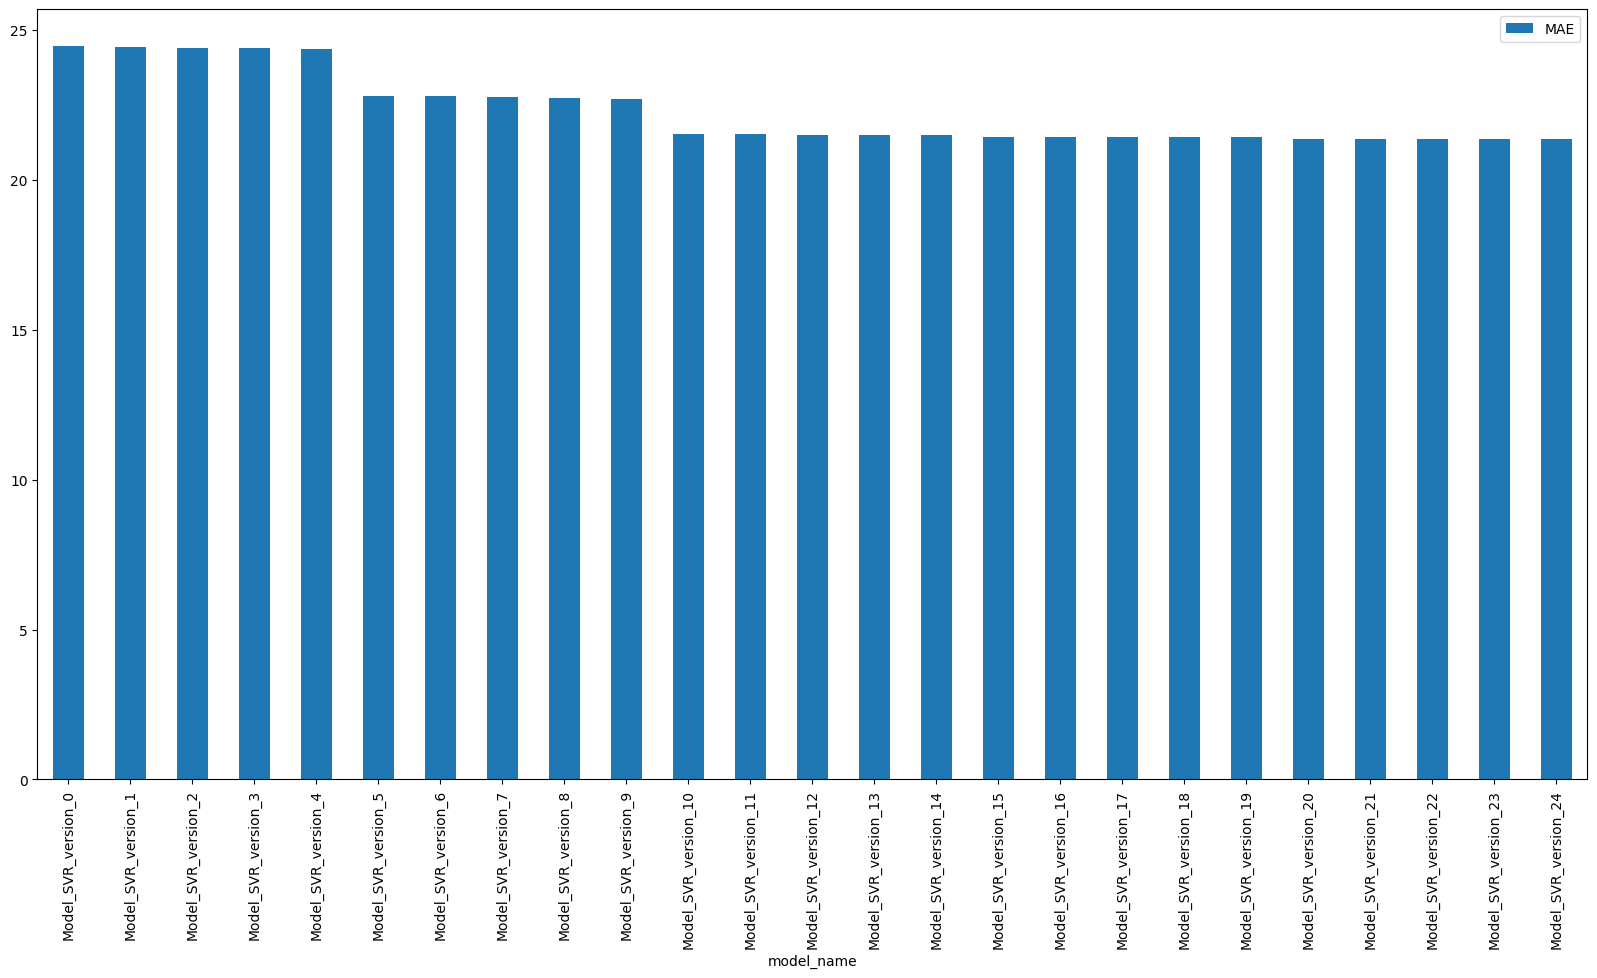

In [ ]:
evaluasi.plot.bar(x='model_name',y="MAE",figsize=(20, 10))

<Axes: xlabel='model_name'>

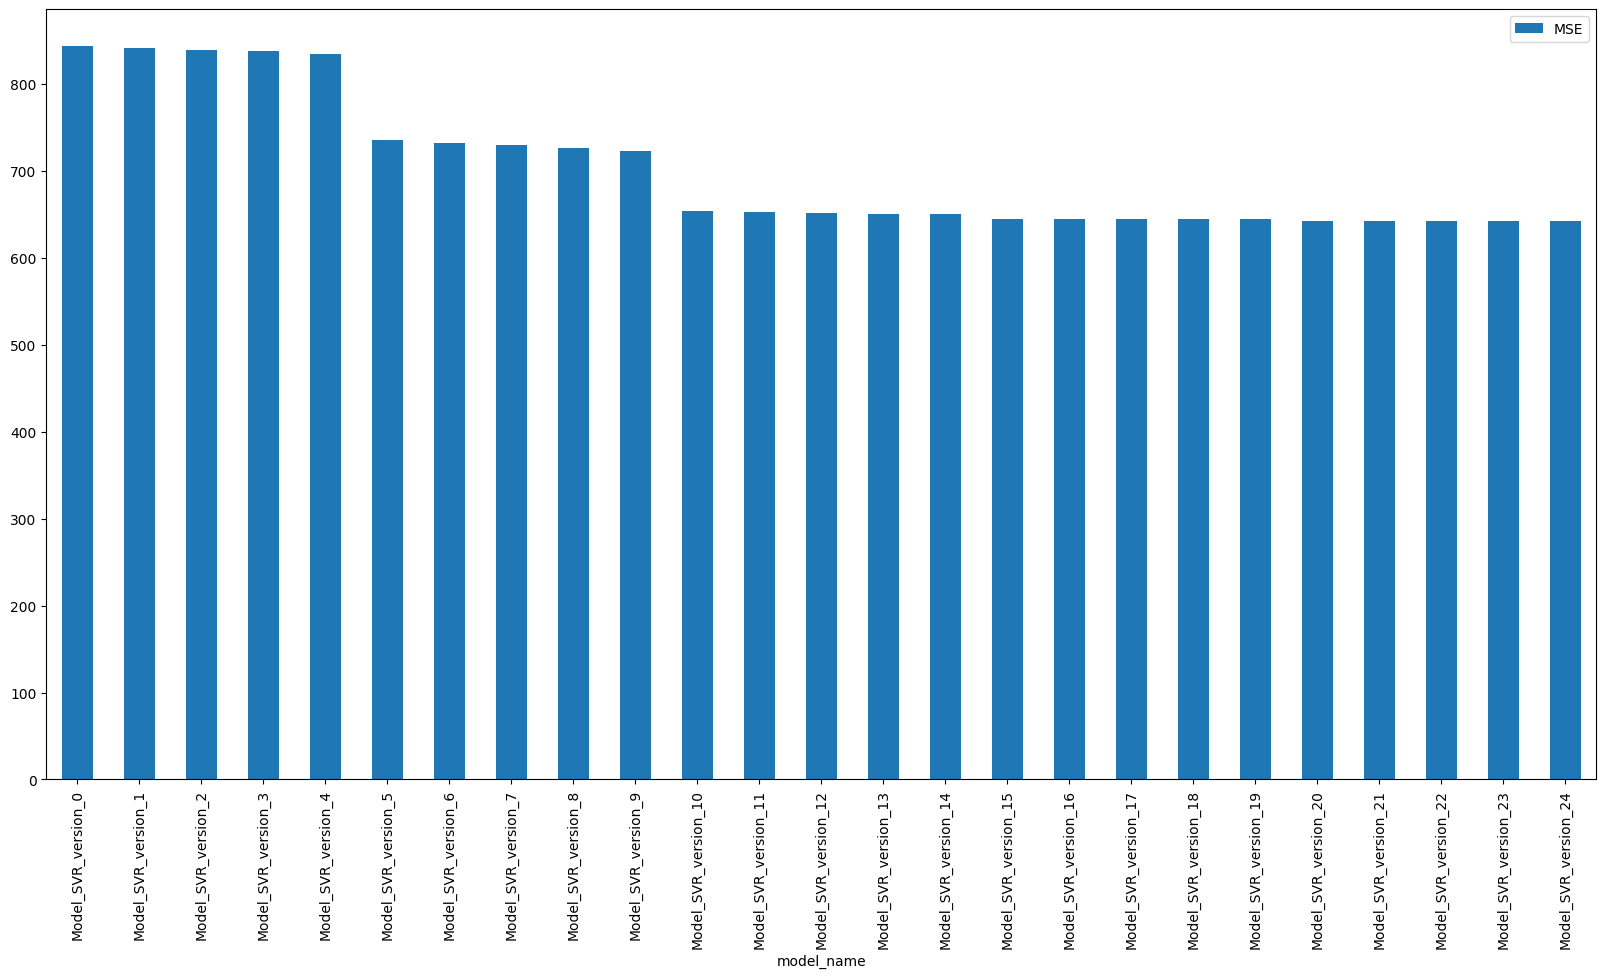

In [ ]:
evaluasi.plot.bar(x='model_name',y="MSE",figsize=(20, 10))

<Axes: xlabel='model_name'>

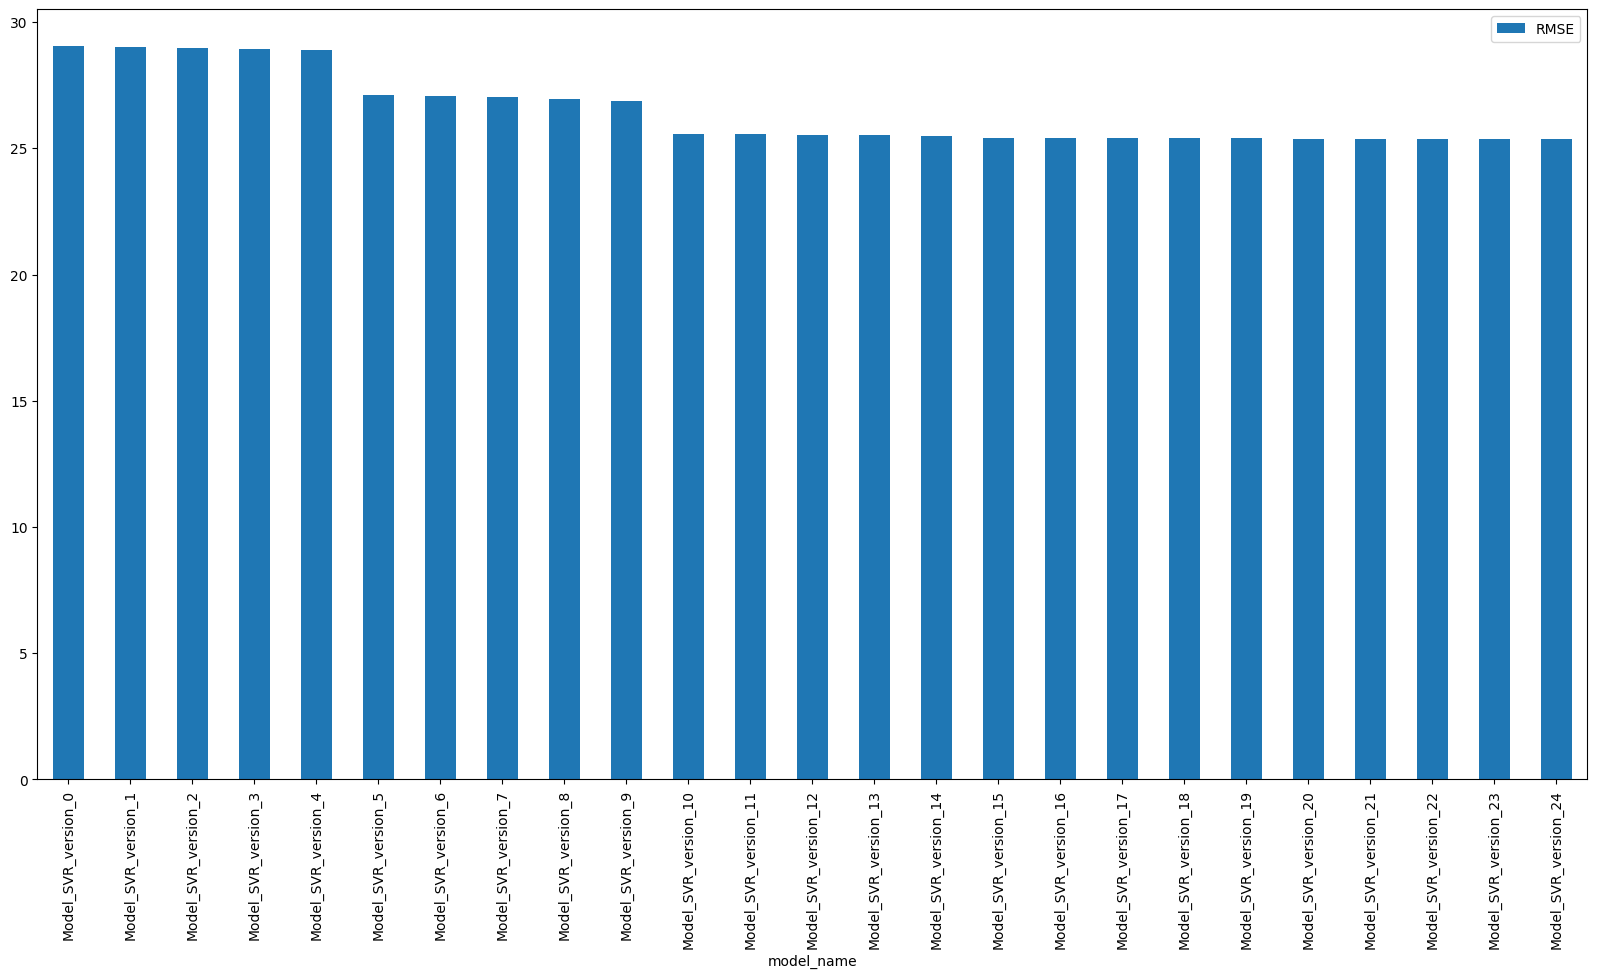

In [ ]:
evaluasi.plot.bar(x='model_name',y="RMSE",figsize=(20, 10))

In [ ]:
def predictData(df,maxData):
  lendf = len(data_transaksi_penjualan)
  xData = np.array([[x] for x in range(lendf,lendf+maxData)])
  y_pred = svr_regressor.predict(xData)

  return pd.DataFrame.from_dict({"week_id":list(xData.flatten()),"predict_transaction":list(y_pred.flatten())})

In [ ]:
predictData(data_transaksi_penjualan,12)

,week_id,predict_transaction
0,327,82.409581
1,328,82.392729
2,329,82.375932
3,330,82.359215
4,331,82.342598
5,332,82.326099
6,333,82.309738
7,334,82.293532
8,335,82.277495
9,336,82.261644


In [ ]:
print("MAE  :",mean_absolute_error(list(y_test),list(y_pred.flatten())))
print("MSE  :",mean_squared_error(list(y_test),list(y_pred.flatten())))
print("RMSE  :",root_mean_squared_error(list(y_test),list(y_pred.flatten())))

MAE  : 20.545918351844737
MSE  : 605.2681971594224
RMSE  : 24.60219903096921


## On Python Function

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

from sklearn.model_selection import train_test_split

data_transaksi_penjualan = pd.read_csv('/content/Data_TPT_Forecasting_Terbaru.csv')
data_transaksi_penjualan = data_transaksi_penjualan[["week_id","total_transactions"]]

data_transaksi_penjualan['week_id'] = data_transaksi_penjualan['week_id'].interpolate()

X = data_transaksi_penjualan[['week_id']].values
y = data_transaksi_penjualan['total_transactions'].values

svr_regressor = SVR(kernel="rbf", C=1000, gamma=0.9, epsilon=0.9)
svr_regressor.fit(X, y)

def predictData(df = data_transaksi_penjualan,maxData=12):
  lendf = len(data_transaksi_penjualan)
  xData = np.array([[x] for x in range(lendf,lendf+maxData)])
  y_pred = svr_regressor.predict(xData)

  return pd.DataFrame.from_dict({"week_id":list(xData.flatten()),"predict_transaction":list(y_pred.flatten())})

# Another Things

In [ ]:
data_transaksi_penjualan.reset_index(drop=True, inplace=True)

# Ambil indeks dari data_transaksi_penjualan yang memiliki nilai NaN pada kolom 'Transaction'
missing_indexes = data_transaksi_penjualan.index[data_transaksi_penjualan['total_transactions'].isnull()]

# Tetapkan prediksi ke posisi yang sesuai dalam DataFrame data_transaksi_penjualan
for i, idx in enumerate(missing_indexes):
    data_transaksi_penjualan.at[idx, 'total_transactions'] = y_pred[i]

# Ambil data penjualan untuk tahun 2023 untuk perhitungan MAE
data_2023 = data_transaksi_penjualan[data_transaksi_penjualan['week_id'] >= 1]

# Ambil 12 bulan terakhir dari data aktual
last_12_actual = data_2023.tail(12)

# Ambil data prediksi untuk tahun 2024
data_prediksi_2024 = data_transaksi_penjualan[data_transaksi_penjualan['week_id'] >= 1]

# Ambil 12 bulan pertama dari data prediksi tahun 2024
first_12_predicted = data_prediksi_2024.head(12)

In [ ]:
# Tampilkan data prediksi untuk tahun 2024
# Menampilkan 12 bulan terakhir untuk tahun 2024
print("\nPrediksi Total Transaksi untuk Tahun 2024:")
print(data_transaksi_penjualan['total_transactions'].tail(12))


Prediksi Total Transaksi untuk Tahun 2024:
315    104
316    115
317    110
318    121
319    102
320    148
321    154
322     71
323     97
324     98
325     98
326     95
Name: total_transactions, dtype: int64


In [ ]:
# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(last_12_actual['total_transactions'], first_12_predicted['total_transactions'])
print("Mean Absolute Error (MAE) untuk tahun 2024:", mae)

Mean Absolute Error (MAE) untuk tahun 2024: 35.5
